
🔹 SIFT Dataset Preview:
  Protein Amino_Acid  sift_Score
0  A5A607       K60Q    0.197799
1  A5A607       Y56C    0.174970
2  A5A607       Y56S    0.415581
3  A5A630       A16V    0.516738
4  A5A630       A47T    0.387271

🔹 FoldX Dataset Preview:
  Protein Amino_Acid  foldX_Score
0  A5A607       E63D      1.84216
1  A5A607       K60Q      0.51710
2  A5A607       Y56C      0.72870
3  A5A607       Y56S      0.84212
4  P00350      A117S     -0.09854
  Protein Amino_Acid  sift_Score  foldX_Score
0  A5A607       K60Q    0.197799      0.51710
1  A5A607       Y56C    0.174970      0.72870
2  A5A607       Y56S    0.415581      0.84212
3  P00350      A117S    0.401519     -0.09854
4  P00350      A117T    0.282769      0.92352
      Protein Amino_Acid  sift_Score  foldX_Score
82     P00350       G48C    0.031864      2.25298
100    P00350      L115F    0.028872      3.12672
102    P00350      L204F    0.009560      3.31406
103    P00350      L208R    0.027592      4.38690
209    P00363      I1

<ipython-input-1-6cf36c642d70>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amino_acid_counts.index, y=amino_acid_counts.values, palette="viridis")


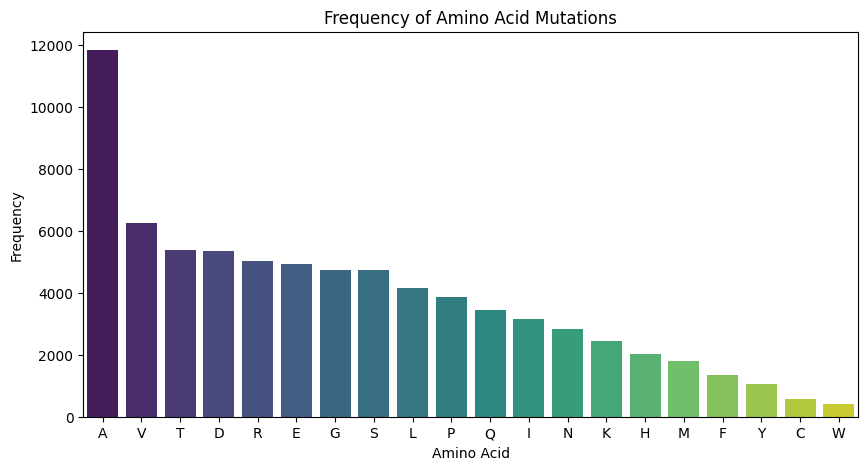

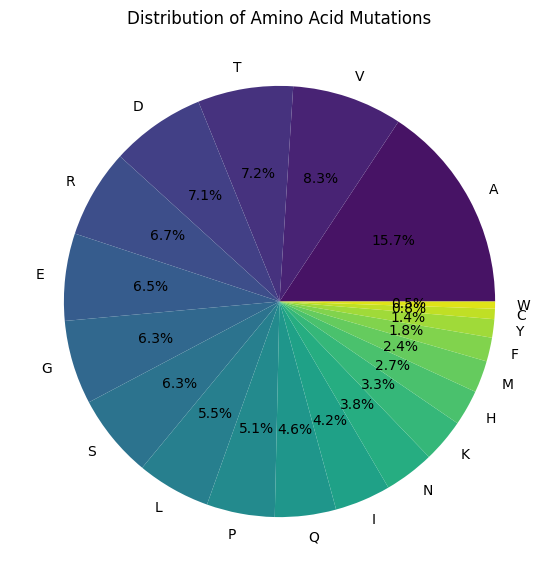

The amino acid with the highest impact on protein structure and function is A, occurring 11828 times.
Amino acids with more than 100 occurrences:
Original_AA
A    11828
V     6241
T     5388
D     5357
R     5011
E     4928
G     4748
S     4723
L     4165
P     3850
Q     3450
I     3161
N     2834
K     2458
H     2016
M     1805
F     1347
Y     1040
C      584
W      403
Name: count, dtype: int64
Correlation between SIFT and FoldX Scores:
              sift_Score  foldX_Score
sift_Score     1.000000    -0.217487
foldX_Score   -0.217487     1.000000
Descriptive Statistics:
          sift_Score   foldX_Score
count  75337.000000  75337.000000
mean       0.372377      0.772035
std        0.320345      2.177188
min        0.000000    -22.568600
25%        0.079134     -0.214800
50%        0.295795      0.347000
75%        0.599201      1.207200
max        1.000000     67.204000


In [1]:
# Load the Excel files
import pandas as pd

# Load SIFT dataset
url = "https://raw.githubusercontent.com/PrashantPhulpagar/HackBio_Coding_Internship/main/stage-two/SIFT.xlsx"
# Read Excel file (use engine="openpyxl" for .xlsx files)
sift_df = pd.read_excel(url, engine="openpyxl")

# Load FoldX dataset
url = "https://raw.githubusercontent.com/PrashantPhulpagar/HackBio_Coding_Internship/main/stage-two/FoldX.xlsx"
# Read Excel file (use engine="openpyxl" for .xlsx files)
foldx_df = pd.read_excel(url, engine="openpyxl")

# Check the first few rows
print("\n🔹 SIFT Dataset Preview:")
print(sift_df.head())

print("\n🔹 FoldX Dataset Preview:")
print(foldx_df.head())

# Merge SIFT and FoldX datasets on 'Protein' and 'Amino_Acid'
merged_df = pd.merge(sift_df, foldx_df, on=['Protein', 'Amino_Acid'], how='inner')

# Display the first few rows of the merged dataset
print(merged_df.head())

filtered_df = merged_df[(merged_df['sift_Score'] < 0.05) & (merged_df['foldX_Score'] > 2)]
print(filtered_df)

# Extract the original amino acid (e.g., E63D → E)
merged_df["Original_AA"] = merged_df["Amino_Acid"].str[0]

# Count occurrences of each original amino acid
amino_acid_counts = merged_df["Original_AA"].value_counts()

import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of amino acid frequency
plt.figure(figsize=(10, 5))
sns.barplot(x=amino_acid_counts.index, y=amino_acid_counts.values, palette="viridis")
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.title("Frequency of Amino Acid Mutations")
plt.show()

# Pie chart of amino acid distribution
plt.figure(figsize=(7, 7))
plt.pie(amino_acid_counts, labels=amino_acid_counts.index, autopct="%1.1f%%", colors=sns.color_palette("viridis", len(amino_acid_counts)))
plt.title("Distribution of Amino Acid Mutations")
plt.show()

# Find the most impactful amino acid
most_impactful_aa = amino_acid_counts.idxmax()
most_impactful_count = amino_acid_counts.max()

print(f"The amino acid with the highest impact on protein structure and function is {most_impactful_aa}, occurring {most_impactful_count} times.")

# Filter amino acids with more than 100 occurrences
high_freq_aa = amino_acid_counts[amino_acid_counts > 100]

print("Amino acids with more than 100 occurrences:")
print(high_freq_aa)

# Compute correlation
correlation = merged_df[['sift_Score', 'foldX_Score']].corr()

print("Correlation between SIFT and FoldX Scores:\n", correlation)

# Generate summary statistics
print("Descriptive Statistics:\n", merged_df[['sift_Score', 'foldX_Score']].describe())

#@markdown ### **Key Insights**
#@markdown - The most impacted amino acid is crucial for protein stability or function, affecting folding or interactions.
#@markdown - High-frequency mutations occur in structurally important (e.g., α-helices, β-sheets) or functionally critical (e.g., active sites, binding regions) residues.
#@markdown - Hydrophobic mutations can disrupt stability, while hydrophilic ones may alter solubility or enzymatic activity.
#@markdown - These hotspots indicate strong selective pressure and potential functional significance.
